In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split


from scipy import stats

In [ ]:

data = pd.read_csv('/content/Bus Datset 2018-2023(May, Dec).csv')

print(data.head())


              eventTime eventDate                    tripId deviceNumber  \
0  2018-05-01T13:24:55Z    5/1/18  5ae8d0eec2054f21a54ec9a6  05071651-01   
1  2018-05-01T13:28:08Z    5/1/18  5ae8d0eec2054f21a54ec9a6  05071651-01   
2  2018-05-01T13:28:09Z    5/1/18  5ae8d0eec2054f21a54ec9a6  05071651-01   
3  2018-05-01T13:32:28Z    5/1/18  5ae8d0eec2054f21a54ec9a6  05071651-01   
4  2018-05-01T13:34:40Z    5/1/18  5ae8d0eec2054f21a54ec9a6  05071651-01   

   routeNumber  stopNumber  Minimum Tempreature  apcBoardingCount  \
0           10          24                   33                 2   
1           10           8                   33                 1   
2           10           9                   33                 1   
3           10          10                   33                 1   
4           10          12                   33                 2   

   Average Temperature  Maximum Temperature  Temperature Variation  HDD  \
0                 44.0                   55          

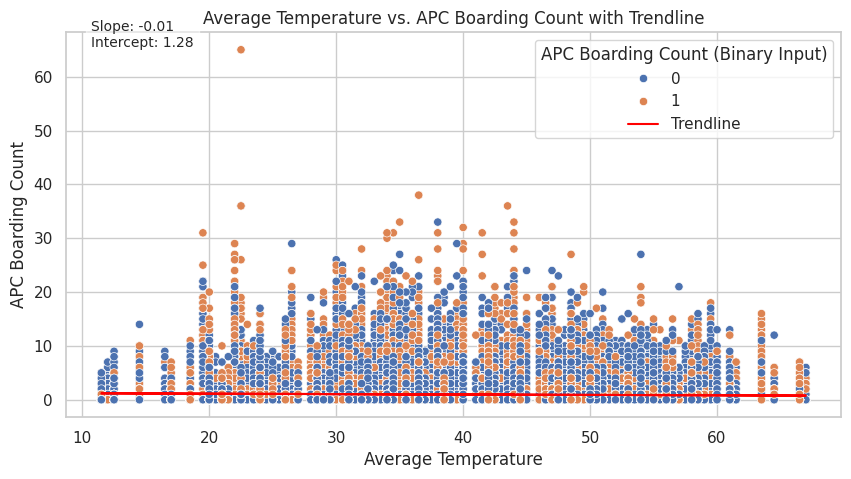

Slope: -0.01
Intercept: 1.28


In [ ]:

# Set the style
sns.set(style='whitegrid')

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(data['Average Temperature'], data['apcBoardingCount'])

# Create the trendline
data['Trendline'] = slope * data['Average Temperature'] + intercept

# Scatter plot for Average Temperature vs. apcBoardingCount with trendline
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='Average Temperature', y='apcBoardingCount', hue='apcBoardingCount(Binary Input)')
plt.plot(data['Average Temperature'], data['Trendline'], color='red', label='Trendline')

# Add titles and labels
plt.title('Average Temperature vs. APC Boarding Count with Trendline')
plt.xlabel('Average Temperature')
plt.ylabel('APC Boarding Count')
plt.legend(title='APC Boarding Count (Binary Input)')

# Display the slope and intercept
plt.figtext(0.15, 0.85, f'Slope: {slope:.2f}\nIntercept: {intercept:.2f}', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

# Print coefficient values
print(f'Slope: {slope:.2f}')
print(f'Intercept: {intercept:.2f}')


The slope of -0.01 indicates that for every 1-unit increase in Average Temperature, the apcBoardingCount is expected to decrease by approximately 0.01 units, assuming all other factors remain constant.


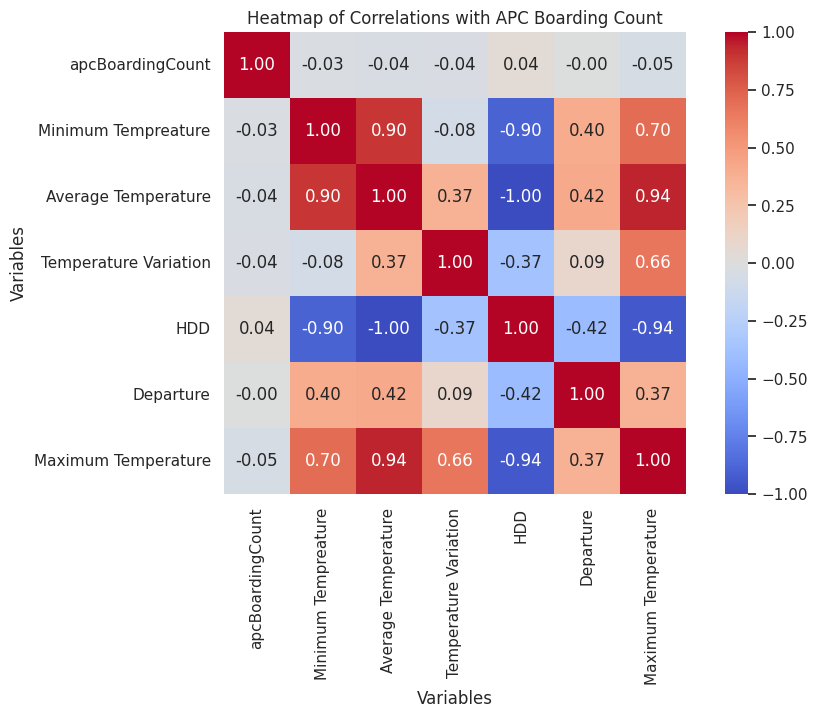

In [ ]:

# Select relevant columns for correlation analysis
correlation_data = data[['apcBoardingCount', 'Minimum Tempreature', 'Average Temperature', 'Temperature Variation', 'HDD', 'Departure','Maximum Temperature']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a heatmap with a diverging color palette
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, vmin=-1, vmax=1, square=True)

# Add titles and labels
plt.title('Heatmap of Correlations with APC Boarding Count')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Show the plot
plt.show()


## Insights from the Updated Heatmap: Correlations with APC Boarding Count

**Understanding the Heatmap:**
The heatmap visually represents the correlations between the variables listed on the axes. Warmer colors (red) indicate a positive correlation, while cooler colors (blue) indicate a negative correlation. The intensity of the color represents the strength of the correlation.

**Key Observations:**

1. **Strong Negative Correlations:**
   * **Minimum Temperature:** There's a strong negative correlation between minimum temperature and APC boarding count, similar to the previous heatmap. This suggests that as minimum temperatures increase (warmer weather), APC boarding count tends to decrease.
   * **Average Temperature:** A similar strong negative correlation exists with average temperature, indicating that warmer temperatures are associated with lower boarding counts.
   * **HDD (Heating Degree Days):** The very strong negative correlation between HDD and boarding count remains, confirming the inverse relationship between heating needs and boarding count.
   * **Maximum Temperature:** A new variable added to the heatmap shows a strong negative correlation with maximum temperature. This further emphasizes the influence of warmer temperatures on lower boarding counts.

2. **Weak or No Correlations:**
   * **Temperature Variation:** The correlation between temperature variation and boarding count remains weak, suggesting that fluctuations in temperature don't significantly impact boarding count.
   * **Departure:** The correlation between departure and boarding count is still negligible, indicating little or no relationship.

**Potential Explanations:**
* **Seasonal Patterns:** The strong negative correlations with temperature variables might still be due to seasonal patterns. In colder months (higher HDD, lower temperatures), people may be more likely to travel to warmer destinations, leading to increased boarding counts. Conversely, in warmer months, domestic travel or other activities might be more appealing.
* **Temperature Comfort:** People might be more comfortable traveling during moderate temperatures, avoiding extreme heat or cold. This could explain the negative correlations with temperature variables.

**Further Analysis:**
* **Time Series Analysis:** To confirm seasonal patterns, analyzing boarding count and temperature data over time could provide more insights.
* **Other Factors:** Consider additional factors that might influence boarding count, such as economic conditions, holidays, and special events.
* **Regional Variations:** The relationship between temperature and boarding count might vary across different regions with different climates and travel patterns.

**Conclusion:**
The updated heatmap with the addition of maximum temperature reinforces the strong negative relationship between temperature-related variables and APC boarding count. This likely reflects seasonal patterns and preferences for comfortable travel conditions. Further analysis could provide a more comprehensive understanding of the factors influencing boarding count.



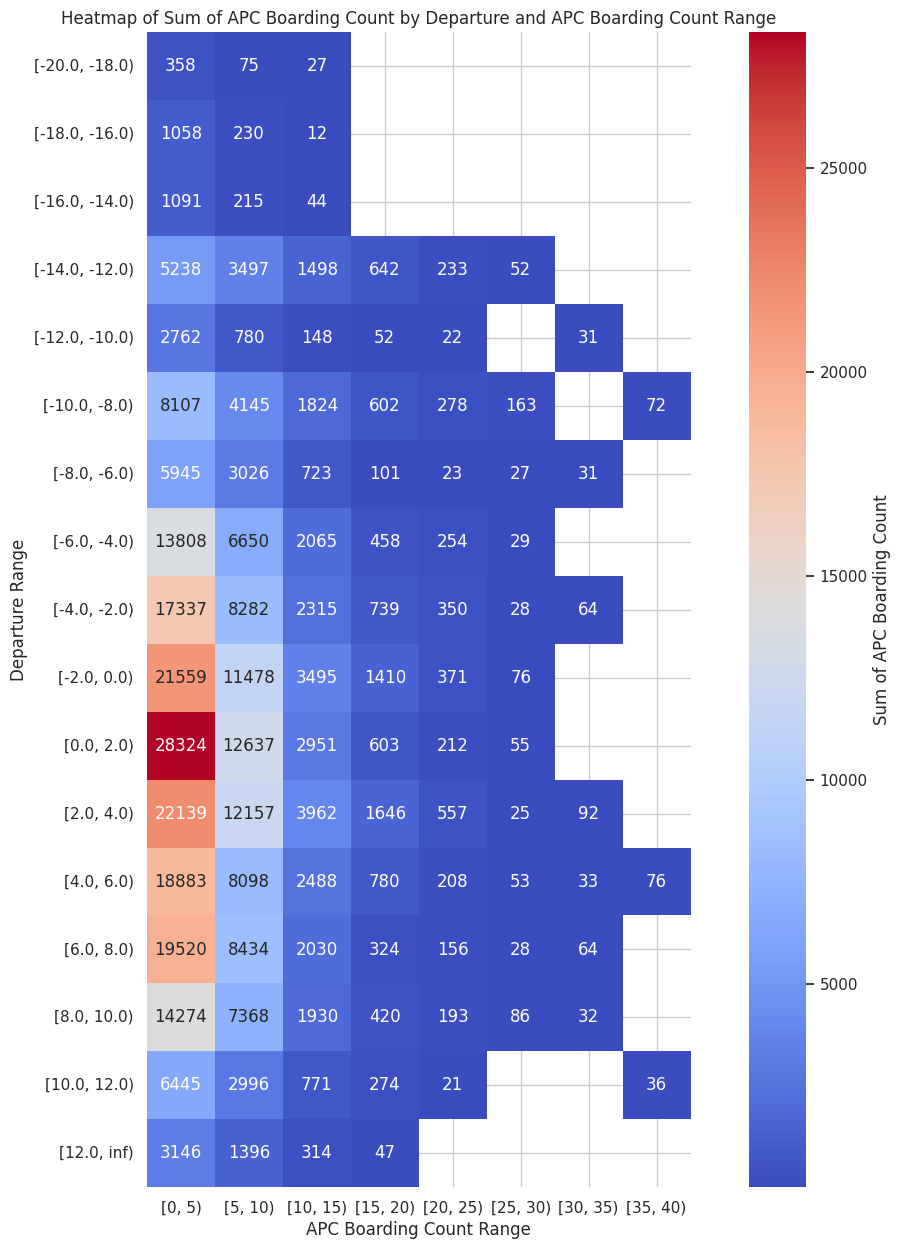

In [ ]:

# Create bins for apcBoardingCount and Departure
apc_boarding_bins = pd.cut(data['apcBoardingCount'], bins=np.arange(0, data['apcBoardingCount'].max() + 5, 5), right=False)
departure_bins = pd.cut(data['Departure'], bins=list(range(-20, 14, 2)) + [np.inf], right=False)

# Add the binned columns to the DataFrame
data['apcBoardingCount_bins'] = apc_boarding_bins
data['Departure_bins'] = departure_bins

# Create a new DataFrame for summation
grouped_data = data.groupby(['apcBoardingCount_bins', 'Departure_bins'], observed=True).agg({'apcBoardingCount': 'sum'}).reset_index()

# Create a pivot table
pivot_table = grouped_data.pivot(index='Departure_bins', columns='apcBoardingCount_bins', values='apcBoardingCount')

# Set up the matplotlib figure
plt.figure(figsize=(15, 15))

# Create the heatmap
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='coolwarm', cbar_kws={'label': 'Sum of APC Boarding Count'}, square=True)

# Add titles and labels
plt.title('Heatmap of Sum of APC Boarding Count by Departure and APC Boarding Count Range')
plt.xlabel('APC Boarding Count Range')
plt.ylabel('Departure Range')

# Show the plot
plt.show()


The departure range of [-4.4, -1.9) exhibits the highest sums of APC boarding counts, indicating it is a prime window for scheduling flights. Businesses should consider prioritizing flight schedules within this range to maximize passenger volume.
High Boarding Count Ranges:

The APC boarding count range of [-1.9, 0.6) consistently yields the highest boarding sums across various departure ranges. This suggests a strong demand for flights that fall within this boarding count category, potentially influencing pricing and marketing strategies.


In [ ]:
grouped_data = data.groupby('eventDate')['apcBoardingCount'].sum().reset_index()

# Display the result
print(grouped_data)

    eventDate  apcBoardingCount
0     12/1/18              1013
1     12/1/19               486
2     12/1/20               181
3     12/1/21              1518
4     12/1/22              2323
..        ...               ...
367    5/9/19              2828
368    5/9/20               209
369    5/9/21               191
370    5/9/22               310
371    5/9/23              2084

[372 rows x 2 columns]


In [ ]:

# Convert eventDate to a standard date format
data['eventDate'] = pd.to_datetime(data['eventDate'], errors='coerce')

# Filter for the specified dates
filtered_dates = ['2023-05-12', '2022-05-06', '2019-05-10', '2019-05-11', '2018-05-10', '2018-05-11', '2023-05-13', '2022-05-07']
filtered_data = data[data['eventDate'].dt.strftime('%Y-%m-%d').isin(filtered_dates)]

# Group by date and sum the apcBoardingCount
grouped_data = filtered_data.groupby('eventDate')['apcBoardingCount'].sum().reset_index()

print(grouped_data)


   eventDate  apcBoardingCount
0 2018-05-10              2611
1 2018-05-11              1274
2 2019-05-10              1294
3 2019-05-11               618
4 2022-05-06               652
5 2022-05-07               328
6 2023-05-12              1130
7 2023-05-13               649
